In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('diamonds.csv')

In [3]:
data = data.drop(['Unnamed: 0'], axis=1)
data.head()
#cut, color and clarity seem like categorical attributes

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
data.info()
#from observation we can see that there are no empty attributes
#hence we won't have to worry about the working strategies to tackle them

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [5]:
data["cut"].value_counts()
#cut indeed is categorical

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [6]:
data["color"].value_counts()
#color is also categorical

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [7]:
data["clarity"].value_counts()
#clarity is also categorical

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [8]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [9]:
data = data.sample(frac=1)
X = data.drop(["price"], axis = 1)
y = data["price"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state= 42)

In [10]:
X_train.head(3)

,carat,cut,color,clarity,depth,table,x,y,z
26607,2.54,Very Good,H,SI2,63.5,56.0,8.68,8.65,5.50
4518,1.00,Fair,G,SI1,43.0,59.0,6.32,6.27,3.97
4649,0.90,Good,H,VS1,64.0,59.0,6.05,6.01,3.86


In [11]:
y_train.head(3)

26607    16353
4518      3634
4649      3669
Name: price, dtype: int64

In [12]:
X_train.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z'], dtype='object')

In [13]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37758 entries, 26607 to 42855
Data columns (total 9 columns):
carat      37758 non-null float64
cut        37758 non-null object
color      37758 non-null object
clarity    37758 non-null object
depth      37758 non-null float64
table      37758 non-null float64
x          37758 non-null float64
y          37758 non-null float64
z          37758 non-null float64
dtypes: float64(6), object(3)
memory usage: 2.9+ MB


# Transformation Pipelines

In [14]:
from sklearn.base import BaseEstimator, TransformerMixin

class DFSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

cat_attributes = ['cut','color','clarity']
num_attributes = list(X_train.drop(cat_attributes,axis=1))

num_pipeline = Pipeline([
    ('selector', DFSelector(num_attributes)),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('selector', DFSelector(cat_attributes)),
    ('encoder', OneHotEncoder(sparse=False))
])

In [16]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline)
])


In [17]:
X_train_prepared = full_pipeline.fit_transform(X_train,y_train)

In [18]:
sample = X_train_prepared[0]
sample

array([ 3.71525394,  1.22188561, -0.65400503,  2.64980303,  2.54465147,
        2.78432986,  0.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ])

# Decision Tree Regressor

In [19]:
from sklearn.tree import DecisionTreeRegressor

reg_tree = DecisionTreeRegressor()
reg_tree.fit(X_train_prepared, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [20]:
from sklearn.metrics import mean_squared_error
import numpy as np

predictions = reg_tree.predict(X_train_prepared)
lin_mse = mean_squared_error(y_train, predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

9.064213484903108

In [21]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(reg_tree, X_train_prepared, y_train, scoring = "neg_mean_squared_error", cv=10)

In [22]:
np.sqrt(-scores).mean()

750.1625136424657

In [23]:
np.sqrt(-scores).std()

16.295899668921496

In [24]:
data["price"].mean()

3932.799721913237

In [34]:
X_test_prepared = full_pipeline.fit_transform(X_test,y_test)
pred_tree = reg_tree.predict(X_test_prepared) 

In [36]:
diff = pd.DataFrame(data = pred_tree)
diff.columns = ['Predicted']

In [37]:
diff.head(5) 

,Predicted
0,17713.0
1,5055.0
2,720.0
3,4189.0
4,11255.0


In [38]:
diff["Actual"] = y_test.values
percent_diff = ((abs(diff["Predicted"]-diff["Actual"])/diff["Actual"])*100).mean()
percent_arr = (abs(diff["Predicted"]-diff["Actual"])/diff["Actual"])*100

per_5 = 0
for x in percent_arr:
    if(x<=5):
        per_5 = per_5+1
        
print('percent predictions with less than 5% deviation from actual value= ',(per_5/len(percent_arr))*100)

per_10 = 0
for x in percent_arr:
    if(x<=10):
        per_10 = per_10+1
        
print('percent predictions with less than 10% deviation from actual value= ',(per_10/len(percent_arr))*100)


print('percent error on average= ',percent_diff)
#the predicted and actual values differ by apprx 9.42%
#this looks pretty bad, only 43% of the predictions had an error of less than 5%
#we will try some other regressor to tackle this issue

percent predictions with less than 5% deviation from actual value=  36.19453714003213
percent predictions with less than 10% deviation from actual value=  56.803856136447905
percent error on average=  11.53791017673002


In [40]:
pred_tree

array([17713.,  5055.,   720., ...,  3162.,  5420.,  1862.])

In [31]:
y_test.values

array([16304,  6303,   743, ...,  3435,  6037,  2576], dtype=int64)

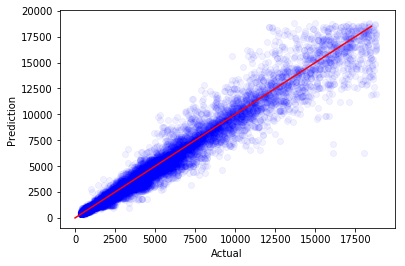

In [41]:
import matplotlib.pyplot as plt
import numpy as np

def draw_predictions_actual(test_arr, pred_arr):
    t = np.linspace(0,18500,1000)
    leng = len(pred_arr)
    plt.plot(t,t,c='red')
    plt.scatter(test_arr, pred_arr, alpha=0.05, c='blue')
    plt.xlabel('Actual')
    plt.ylabel('Prediction')
    plt.show()
    
draw_predictions_actual(y_test.values, pred_tree)
plt.show()

# SVM Regressor

In [42]:
#now we will try the SVC Regressor
from sklearn import svm

clf = svm.SVR(kernel='linear')
clf.fit(X_train_prepared, y_train.values)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [43]:
clf.score(X_test_prepared, y_test.values)
#svm gave accuracy of ~85% on test dataset

0.8408660754491666

In [44]:
pred_svm = clf.predict(X_test_prepared) 

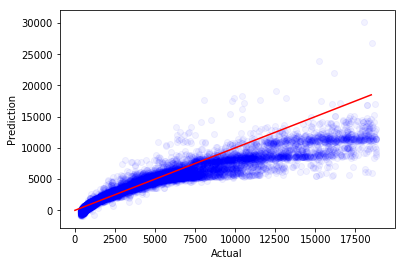

In [45]:
draw_predictions_actual(y_test.values, pred_svm)
plt.show()

In [47]:
diff_svm = pd.DataFrame(data = pred_svm)
diff_svm.columns = ['Predicted']

diff_svm["Actual"] = y_test.values
percent_diff_svm = ((abs(diff_svm["Predicted"]-diff_svm["Actual"])/diff_svm["Actual"])*100).mean()
percent_arr = (abs(diff_svm["Predicted"]-diff_svm["Actual"])/diff_svm["Actual"])*100

per_5 = 0
for x in percent_arr:
    if(x<=5):
        per_5 = per_5+1
        
print('percent predictions with less than 5% deviation from actual value= ',(per_5/len(percent_arr))*100)

per_10 = 0
for x in percent_arr:
    if(x<=10):
        per_10 = per_10+1
        
print('percent predictions with less than 10% deviation from actual value= ',(per_10/len(percent_arr))*100)


print('percent error on average= ',percent_diff_svm)

percent predictions with less than 5% deviation from actual value=  17.28463725126684
percent predictions with less than 10% deviation from actual value=  32.795698924731184
percent error on average=  24.537247848821544


In [48]:
scores = cross_val_score(clf, X_train_prepared, y_train, scoring = "neg_mean_squared_error", cv=10)
print(np.sqrt(-scores).mean())
np.sqrt(-scores).std()

1510.1995147035686


44.17761599696236

# Linear Regression

In [49]:
from sklearn.linear_model import LinearRegression

regr_linear = LinearRegression()
regr_linear.fit(X_train_prepared, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [50]:
regr_linear.score(X_train_prepared,y_train)
#the score is more promising than SVM

0.9212302211240244

In [51]:
pred_lr = regr_linear.predict(X_test_prepared) 

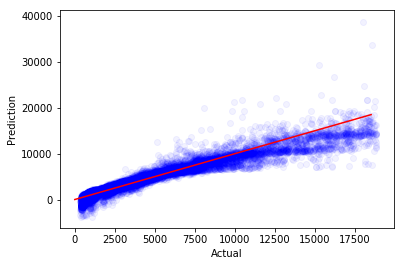

In [52]:
draw_predictions_actual(y_test.values, pred_lr)
plt.show() 

In [ ]:
diff_lr = pd.DataFrame(data = pred_lr)
diff_lr.columns = ['Predicted']

diff_lr["Actual"] = y_test.values
percent_diff_lr = ((abs(diff_lr["Predicted"]-diff_lr["Actual"])/diff_lr["Actual"])*100).mean()
percent_arr = (abs(diff_lr["Predicted"]-diff_lr["Actual"])/diff_lr["Actual"])*100

per_5 = 0
for x in percent_arr:
    if(x<=5):
        per_5 = per_5+1
        
print('percent predictions with less than 5% deviation from actual value= ',(per_5/len(percent_arr))*100)

per_10 = 0
for x in percent_arr:
    if(x<=10):
        per_10 = per_10+1
        
print('percent predictions with less than 10% deviation from actual value= ',(per_10/len(percent_arr))*100)


print('percent error on average= ',percent_diff_lr)

In [ ]:
diff

In [ ]:
scores = cross_val_score(regr_linear, X_train_prepared, y_train, scoring = "neg_mean_squared_error", cv=10)
print(np.sqrt(-scores).mean())
np.sqrt(-scores).std()